
nodal analysis mainly being use to analyse performance of production system which include from reservior to seprator(reservior,bottom hole,tubing,well head,seprator)
Fluid properties,pressure ,rate change with the location-dependent pressure and temperature in the oil and gas production system.

The system analysis for determination of fluid production rate and pressure at a specified node is called ‘‘Nodal analysis’’  Nodal analysis is performed on the principle of pressure continuity, that is, there is only one uniquepressure value at a given node regardless of whether thepressure is evaluated from the performance of upstream
equipment or downstream equipment. 

The performance curve (pressure–rate relation) of upstream equipment is called ‘‘inflow performance curve’’; the performance
curve of downstream equipment is called ‘‘outflow performance curve.’’ The intersection of the two performance
curves defines the operating point, that is, operating flow
rate and pressure, at the specified node. 

For the convenience of using pressure data measured normally at either the bottom-hole or the wellhead, Nodal analysis is usually conducted using the bottom-hole or wellhead as the solution node. 

source==: Petroleum Production Engineering guo byon


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import LineString




In [2]:
IPR=pd.DataFrame({'pwf':[4000,3500,3000,2500,2000,1500,1000,500,14.7],
                 'Q':[0,1999,3094,3902,4512,4963,5275,5458,5519]})
IPR

,pwf,Q
0,4000.0,0
1,3500.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


In [5]:
q=np.arange(1000,6500,500)
q
p_190=[1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]
p_2375=[1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]
p_2875=[1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]
TPR=pd.DataFrame({'q':q,'pwf(1.90" tubig)':p_190,'pwf(2.375" tubig)':p_2375,'pwf(2.875" tubig)':p_2875})
TPR

,q,"pwf(1.90"" tubig)","pwf(2.375"" tubig)","pwf(2.875"" tubig)"
0,1000,1334,1298,1286
1,1500,1400,1320,1294
2,2000,1487,1351,1305
3,2500,1592,1390,1319
4,3000,1712,1435,1336
5,3500,1843,1487,1356
6,4000,1984,1545,1378
7,4500,2132,1609,1403
8,5000,2287,1677,1431
9,5500,2446,1749,1461


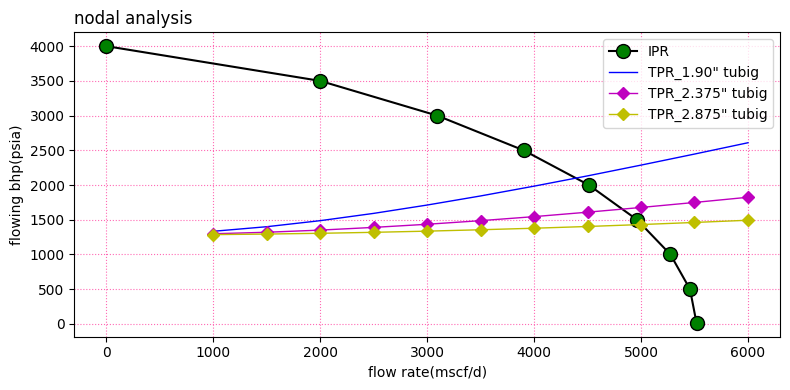

In [21]:
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(IPR['Q'],IPR['pwf'],label='IPR',linewidth=1.5,marker='o',ms=10,mec='k',mfc='g',color='k')
plt.plot(TPR['q'],TPR['pwf(1.90" tubig)'],label='TPR_1.90" tubig',linewidth=1,color='b' )#linestyle='dotted'
plt.plot(TPR['q'],TPR['pwf(2.375" tubig)'],label='TPR_2.375" tubig',linewidth=1,marker='D',color='m')
plt.plot(TPR['q'],TPR['pwf(2.875" tubig)'],label='TPR_2.875" tubig',linewidth=1,marker='D',color='y')#linestyle='dashed'
#--#dashdot -.
plt.rcParams['figure.figsize']=[7.50,3.50]
plt.rcParams['figure.autolayout']=True                                              
plt.xlabel('flow rate(mscf/d)')
plt.ylabel('flowing bhp(psia)')
plt.title('nodal analysis',loc='left')
plt.grid(color='hotpink',ls=':')#axis=y
plt.legend(loc='best')

inflow performance relationship-IPR desrcibe the ability to deliver the hydrocarbn fluid to well bore it is the relationship between bottomhole pressure and production rate under given reservior pressure. IPR mainly being use to evaluete reservior deliverability which is defined as the oil or gas production rate achievable from reservoir at a given bottom-hole
pressure

IPR can be changed by increasing reservior( by doing water or gas injection),decreasing viscsity(steam injection ),increasing permeability(well stimulation or reperformation.)


tubing performance relantionship=TPR describe the ability to deliver the hydrocarbon from wellbore to surface.TPR anlysis involves establish relationship between tubing size,well head and bottomhole pressure ,fluid propreties and prodcution rate 

undersize tubing- may cuase higher friction due to viscous drag and redcution in production rate

oversize tubing-- may cuase liquid loading due to slippage effect

TPR mainly affected by multiphase flow,tubing size,back pressure at well head ,hyrdostatic and friction pressure in tubing






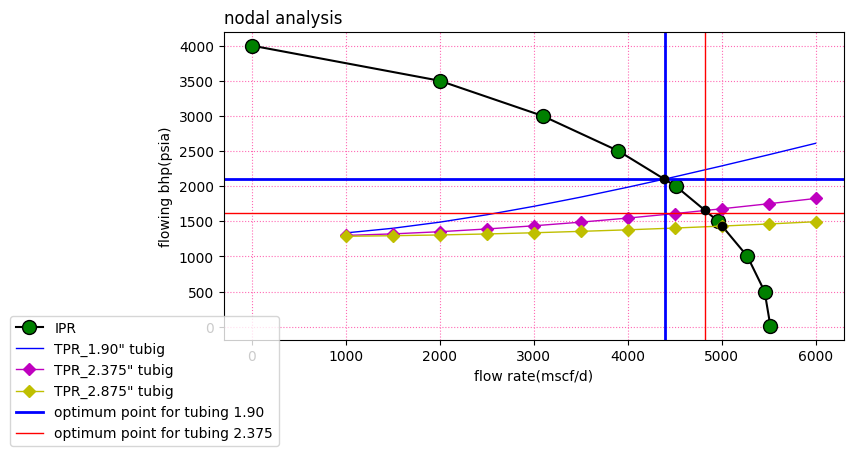

In [25]:
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(IPR['Q'],IPR['pwf'],label='IPR',linewidth=1.5,marker='o',ms=10,mec='k',mfc='g',color='k')
plt.plot(TPR['q'],TPR['pwf(1.90" tubig)'],label='TPR_1.90" tubig',linewidth=1,color='b' )#linestyle='dotted'
plt.plot(TPR['q'],TPR['pwf(2.375" tubig)'],label='TPR_2.375" tubig',linewidth=1,marker='D',color='m')
plt.plot(TPR['q'],TPR['pwf(2.875" tubig)'],label='TPR_2.875" tubig',linewidth=1,marker='D',color='y')#linestyle='dashed'
#--#dashdot -.
plt.rcParams['figure.figsize']=[7.50,3.50]
plt.rcParams['figure.autolayout']=True                                              
plt.xlabel('flow rate(mscf/d)')
plt.ylabel('flowing bhp(psia)')
plt.title('nodal analysis',loc='left')
plt.grid(color='hotpink',ls=':')#axis=y
plt.legend(loc='best')
plt.axvline(x=4400,color='blue',lw=2,label='optimum point for tubing 1.90')
plt.axhline(y=2100,color='blue',lw=2)
line1=LineString(np.column_stack((IPR['Q'],IPR['pwf'])))
plt.axvline(x=4820,color='red',lw=1,label='optimum point for tubing 2.375')
plt.axhline(y=1620,color='red',lw=1)
line2=LineString(np.column_stack((TPR['q'],TPR['pwf(1.90" tubig)'])))
line3=LineString(np.column_stack((TPR['q'],TPR['pwf(2.375" tubig)'])))
line4=LineString(np.column_stack((TPR['q'],TPR['pwf(2.875" tubig)'])))
intersection=line1.intersection(line2)
plt.plot(*intersection.xy,'ko')
intersection=line1.intersection(line3)
plt.plot(*intersection.xy,'ko')
intersection=line1.intersection(line4)
plt.plot(*intersection.xy,'ko')
#plt.axvline(x=5000,color='hotpink',lw=1,label='optimum point for tubing 2.875')
#plt.axhline(y=1405,color='hotpink',lw=1)

plt.legend(loc='upper right' ,bbox_to_anchor=(0.1,0.1))










#black point indicate intersection point  or operating point mean at this point well suitable for producing well economicaly and effectively.